# **PROYECTO FINAL**

# ETAPA 1. ENTENDIMIENTO DE DE LOS DATOS


En el ámbito del marketing directo, las instituciones financieras han recurrido cada vez más a estrategias basadas en datos para maximizar la efectividad de sus campañas. El conjunto de datos proporcionado en este trabajo se centra en las campañas de marketing directo de una institución bancaria portuguesa, basadas en llamadas telefónicas, con el objetivo de determinar si un cliente se suscribirá o no a un depósito a plazo bancario. Este conjunto de datos presenta cuatro variantes, desde la inclusión de todos los ejemplos hasta una selección aleatoria del 10%, con diferentes números de características para adaptarse a diversos modelos de aprendizaje automático.

El objetivo principal de este estudio es emplear técnicas de aprendizaje automático para predecir las suscripciones a depósitos a plazo bancario, lo que tiene un valor estratégico significativo para la institución bancaria al optimizar sus recursos y dirigir sus esfuerzos de marketing hacia los clientes con mayor probabilidad de conversión. A través del análisis de estos datos, se busca no solo comprender el comportamiento del cliente en el contexto de las campañas de marketing directo, sino también proporcionar herramientas prácticas para mejorar la eficacia y la eficiencia de dichas campañas en el futuro. Este estudio se sitúa en la intersección entre el análisis de datos y el marketing estratégico, con el objetivo de informar y mejorar las decisiones comerciales de la institución bancaria.

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'


Los resultados proporcionan una visión general de las características incluidas en el conjunto de datos y su tipo. Se identifican varias características relevantes para el análisis, como la edad, ocupación, estado civil, nivel educativo, saldo, historial crediticio, préstamos, entre otros.

Las características están categorizadas en función de su tipo, que incluye variables categóricas, binarias, enteras y de fecha. Esto sugiere la presencia de una variedad de datos que pueden ser útiles para comprender los factores que influyen en la suscripción a depósitos a plazo bancario.

La característica "y" se identifica como la variable objetivo, que indica si un cliente se suscribió o no a un depósito a plazo bancario. Este será el punto focal del análisis predictivo, utilizando las demás características para predecir esta variable objetivo.

In [4]:
import pandas as pd

# Cargar los datos y metadatos
bank_marketing_data = fetch_ucirepo(id=222)

# Extraer los nombres de las características
feature_names = bank_marketing_data.variables[bank_marketing_data.variables['role'] == 'Feature']['name'].tolist()

# Crear un DataFrame con las características y objetivos
df = pd.DataFrame(data=bank_marketing_data.data.features, columns=feature_names)
df['target'] = bank_marketing_data.data.targets

# Visualizar el DataFrame
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0     NaN            5   may       261         1     -1         0      NaN   
1     NaN            5   may       151         1     -1         0      NaN   
2     NaN            5   may        76         1     -1         0      NaN   
3     NaN            5   may        92         1     -1         0      NaN   
4     NaN            5   may       198         1     -1         0      NaN   

  target  
0     no  
1     no  
2     no  
3     no  
4     no  


In [5]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Interpretamos algunos de los datos proporcionados:


-La edad media de los clientes es de aproximadamente 40.94 años, con una desviación estándar de alrededor de 10.62 años, lo que indica una dispersión moderada alrededor de la media.
El cliente más joven tiene 18 años, mientras que el más anciano tiene 95 años.
El 25% de los clientes tienen 33 años o menos, y el 75% tienen 48 años o menos.
Saldo Bancario (balance):

-El saldo bancario promedio es de aproximadamente 1362.27 euros, con una desviación estándar de 3044.77 euros, lo que sugiere una amplia variabilidad en los saldos.
El saldo mínimo registrado es de -8019 euros, lo que indica que algunos clientes tienen saldos negativos.
El saldo máximo registrado es de 102,127 euros, lo que sugiere la presencia de algunos clientes con saldos muy altos.
Duración de la Llamada (duration):

-La duración media de las llamadas es de aproximadamente 258.16 segundos, con una desviación estándar de 257.53 segundos.
La duración mínima de llamada es de 0 segundos, lo que puede indicar llamadas perdidas o cortas.
La duración máxima de llamada es de 4918 segundos, lo que sugiere llamadas excepcionalmente largas.

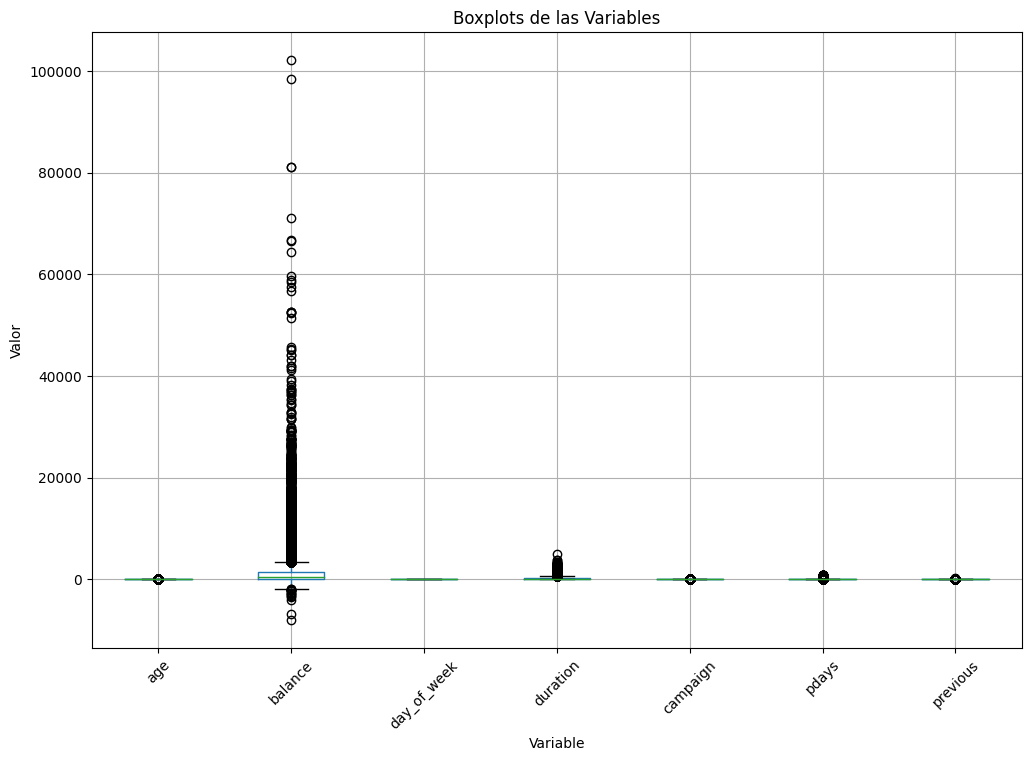

In [6]:
import matplotlib.pyplot as plt

# Crear diagramas de cajas para todas las variables en el DataFrame
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.title('Boxplots de las Variables')
plt.ylabel('Valor')
plt.xlabel('Variable')
plt.show()


En los gráficos de cajas que algunas las variables presentan datos atípicos, en especial para la variable balance.

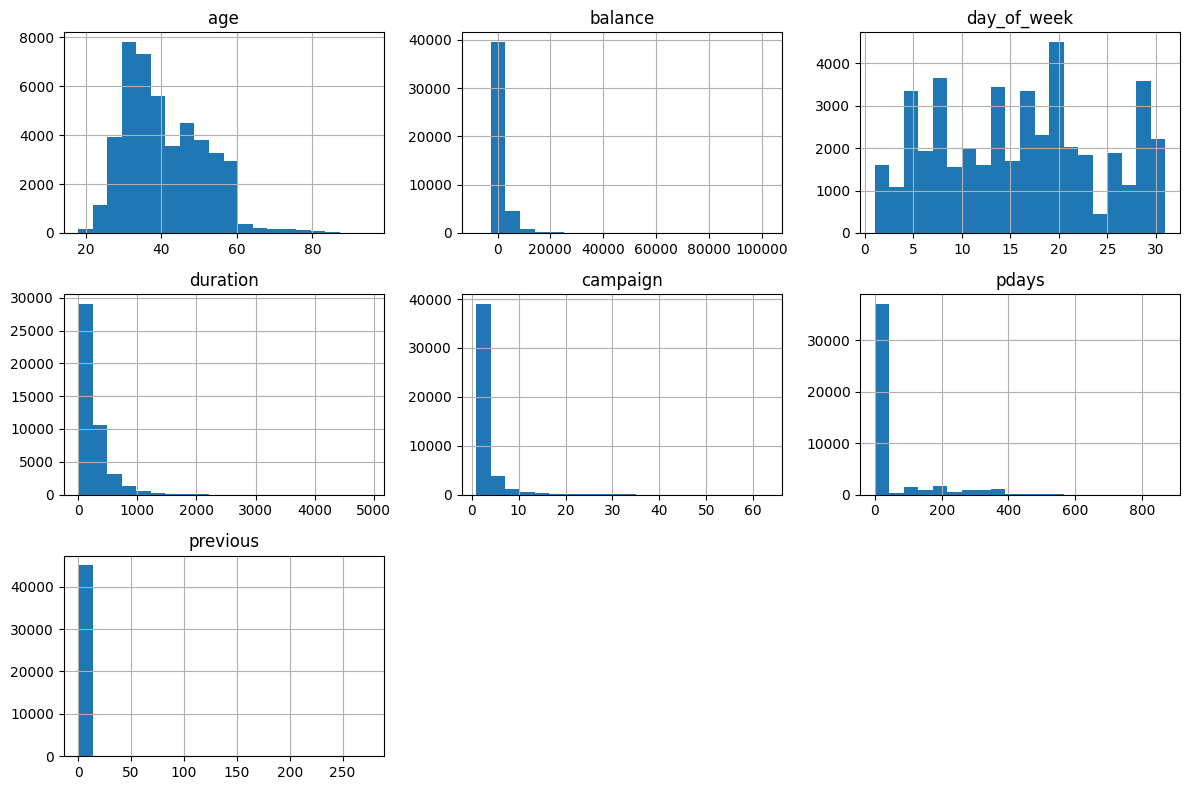

In [7]:

# Crear histogramas para todas las variables en el DataFrame
df.hist(figsize=(12, 8), bins=20)  # Puedes ajustar el número de contenedores (bins) según tus preferencias
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


En el gráfico anterior podemos observar los histogramas para las variables cuantitativas continuas, donde se observa la forma de la distribución. En la mayoría de los casos la distribución no es simétrica.

<ipython-input-8-8afb091bb528>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


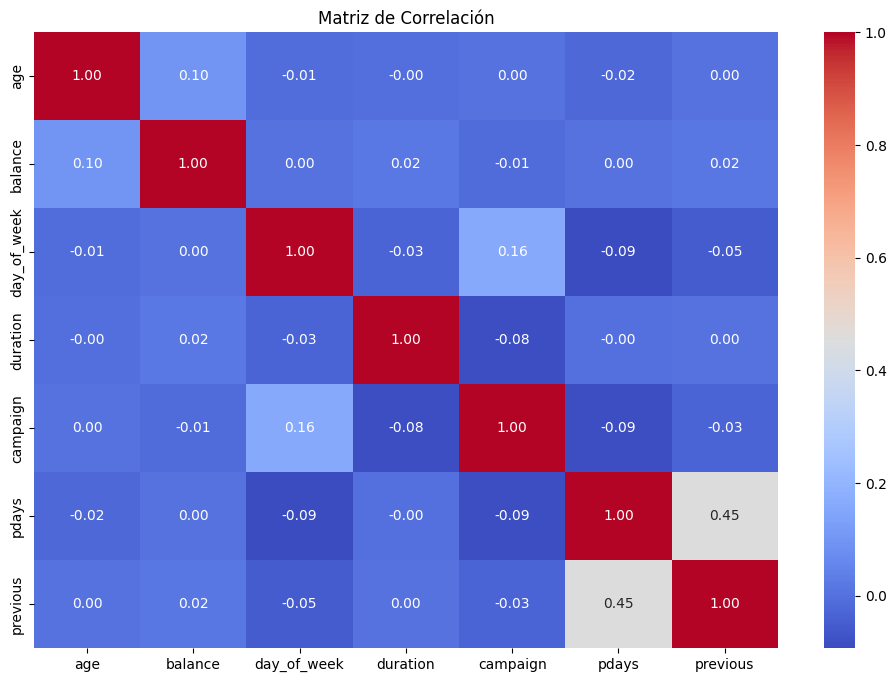

In [8]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Teniendo en cuenta la cantidad de variables, la matriz de correlación muestra la relación (inversa o directa) que existen entre las variables del modelo. Este gráfico nos puede ayudar a detectar si existen problemas de multicolinealidad que pueden generar ruido a la hora de generar nuestros modelos.

# ETAPA 2. PREPARACIÓN DE LOS DATOS

In [9]:
df.info()
#Observamos si el dataset tiene valores nulos, para el ejercicio se tiene que no se cuentan con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dado que el dataset no tiene información con valores nulos o de acuerdo con la fuente de información datos que se deban cambiar, se procede a pasar a la etapa de modelado.

In [10]:
# Verificar si hay valores faltantes en el DataFrame
missing_values = df.isnull().any()

# Mostrar los valores faltantes
print("Valores faltantes en el conjunto de datos:")
print(missing_values)


Valores faltantes en el conjunto de datos:
age            False
job             True
marital        False
education       True
default        False
balance        False
housing        False
loan           False
contact         True
day_of_week    False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome        True
target         False
dtype: bool


In [11]:
# Contar los valores faltantes en cada columna
missing_values_count = df.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
missing_columns = missing_values_count[missing_values_count > 0]

# Mostrar cuántos valores faltantes hay en cada columna que tiene valores faltantes
print("Cantidad de valores faltantes por variable:")
print(missing_columns)


Cantidad de valores faltantes por variable:
job            288
education     1857
contact      13020
poutcome     36959
dtype: int64


Se tiene que hay una gran cantidad de datos faltantes, para realizar el tratamiento de esto realizaremos un método de imputación para estos datos faltantes usando un método de imputación KNNImputer.

In [12]:
# Imputación de moda solo para las variables con valores faltantes en el DataFrame
for col in df.columns:
    if df[col].isnull().any():  # Verificar si la columna tiene valores faltantes
        df[col] = df[col].fillna(df[col].mode().iloc[0])

# Mostrar el DataFrame con valores faltantes imputados
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married  secondary      no     1506     yes   no   
4       33   blue-collar    single  secondary      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [13]:
# Verificar si hay valores faltantes en el DataFrame
missing_values = df.isnull().any()

# Mostrar los valores faltantes
print("Valores faltantes en el conjunto de datos:")
print(missing_values)


Valores faltantes en el conjunto de datos:
age            False
job            False
marital        False
education      False
default        False
balance        False
housing        False
loan           False
contact        False
day_of_week    False
month          False
duration       False
campaign       False
pdays          False
previous       False
poutcome       False
target         False
dtype: bool


Usando la moda, creamos el nuevo data frame para reemplazar los valores faltantes.

# ETAPA 3. MODELADO

Para la implementación se usaran los siguientes modelos:

**Bosques Aleatorios (Random Forest):**

Por qué usarlo: Los Bosques Aleatorios son modelos de aprendizaje automático versátiles y poderosos que se destacan en la clasificación y regresión. Son adecuados para una variedad de problemas debido a su capacidad para manejar datos categóricos y numéricos.

**Gradient Boosting Classifier**

Por qué usarlo: Es conocido por su capacidad para proporcionar predicciones precisas. Al construir múltiples árboles de decisión secuenciales, cada uno de los cuales corrige los errores del anterior, el modelo puede capturar relaciones complejas entre las características y la variable objetivo


**Máquinas de Vectores de Soporte (SVM):**

Por qué usarlo: Las Máquinas de Vectores de Soporte son modelos potentes y flexibles que pueden manejar problemas de clasificación lineales y no lineales. Son particularmente útiles cuando hay una alta dimensionalidad en los datos y cuando se desea una alta precisión en la clasificación.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  target       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
import pandas as pd

# Suponiendo que df es tu DataFrame original

# Realizar one-hot encoding para las variables categóricas
df_encoded = pd.get_dummies(df)

# Reemplazar la columna 'target' con valores numéricos
df_encoded['target'] = df_encoded['target_yes']  # Si 'yes' es 1 y 'no' es 0
df_encoded['target'].replace({'yes': 1, 'no': 0}, inplace=True)  # Si 'yes' es 0 y 'no' es 1

# Eliminar las columnas 'target_no' y 'target_yes'
dfd = df_encoded.drop(columns=['target_no', 'target_yes'])

# Visualizar el nuevo DataFrame dfd
print(dfd.head())


   age  balance  day_of_week  duration  campaign  pdays  previous  job_admin.  \
0   58     2143            5       261         1     -1         0           0   
1   44       29            5       151         1     -1         0           0   
2   33        2            5        76         1     -1         0           0   
3   47     1506            5        92         1     -1         0           0   
4   33        1            5       198         1     -1         0           0   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          1   
1                0                 0  ...          0          0          1   
2                0                 1  ...          0          0          1   
3                1                 0  ...          0          0          1   
4                1                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



# Separar las características (X) y la variable objetivo (y)
X = dfd.drop(columns=['target'])
y = dfd['target']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Inicializar y entrenar el modelo de Máquinas de Vectores de Soporte (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predecir con el modelo de Bosques Aleatorios
rf_pred = rf_model.predict(X_test)

# Predecir con el modelo de Gradient Boosting
gb_pred = gb_model.predict(X_test)

# Predecir con el modelo de Máquinas de Vectores de Soporte (SVM)
svm_pred = svm_model.predict(X_test)

# Calcular métricas de evaluación para cada modelo: precisión, recall y exactitud
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_pred)

# Imprimir las métricas de evaluación para cada modelo
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("Confusion Matrix:")
print(rf_conf_matrix)

print("\nGradient Boosting Classifier:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("Confusion Matrix:")
print(gb_conf_matrix)

print("\nSupport Vector Machine Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("Confusion Matrix:")
print(svm_conf_matrix)


Random Forest Classifier:
Accuracy: 0.9031294924250802
Precision: 0.6736672051696284
Recall: 0.38221814848762603
Confusion Matrix:
[[7750  202]
 [ 674  417]]

Gradient Boosting Classifier:
Accuracy: 0.9024659957978547
Precision: 0.6478076379066479
Recall: 0.41979835013748856
Confusion Matrix:
[[7703  249]
 [ 633  458]]

Support Vector Machine Classifier:
Accuracy: 0.8794647793873714
Precision: 0.5384615384615384
Recall: 0.006416131989000917
Confusion Matrix:
[[7946    6]
 [1084    7]]


**Random Forest Classifier:**

Accuracy (Exactitud): 0.903
Esto significa que el modelo clasifica correctamente el 90.3% de todas las instancias del conjunto de datos.
Precision: 0.674
Del total de instancias clasificadas como positivas por el modelo, el 67.4% son realmente positivas.
Recall (Recuperación): 0.382
El modelo identifica correctamente el 38.2% de todas las instancias que son realmente positivas.
Matriz de Confusión:
Verdaderos Negativos (TN): 7750
Falsos Positivos (FP): 202
Falsos Negativos (FN): 674
Verdaderos Positivos (TP): 417

**Gradient Boosting Classifier:**

Accuracy: 0.902
El modelo clasifica correctamente el 90.2% de todas las instancias del conjunto de datos.
Precision: 0.648
Del total de instancias clasificadas como positivas por el modelo, el 64.8% son realmente positivas.
Recall: 0.420
El modelo identifica correctamente el 42.0% de todas las instancias que son realmente positivas.
Matriz de Confusión:
Verdaderos Negativos (TN): 7703
Falsos Positivos (FP): 249
Falsos Negativos (FN): 633
Verdaderos Positivos (TP): 458

**Support Vector Machine Classifier:**

Accuracy: 0.879
El modelo clasifica correctamente el 87.9% de todas las instancias del conjunto de datos.
Precision: 0.538
Del total de instancias clasificadas como positivas por el modelo, el 53.8% son realmente positivas.
Recall: 0.006
El modelo identifica correctamente solo el 0.6% de todas las instancias que son realmente positivas.
Matriz de Confusión:
Verdaderos Negativos (TN): 7946
Falsos Positivos (FP): 6
Falsos Negativos (FN): 1084
Verdaderos Positivos (TP): 7


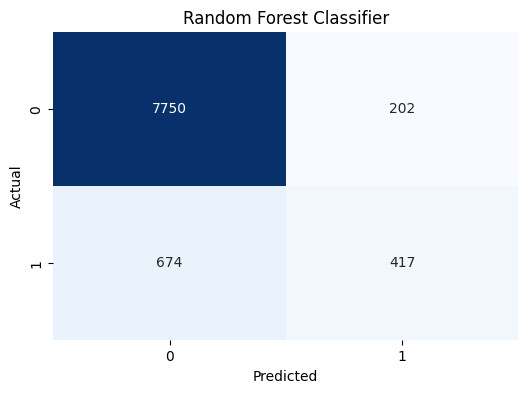

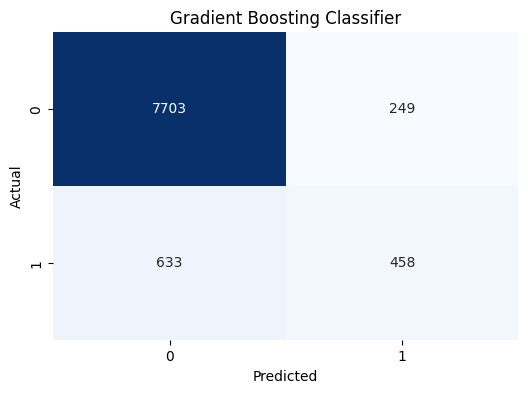

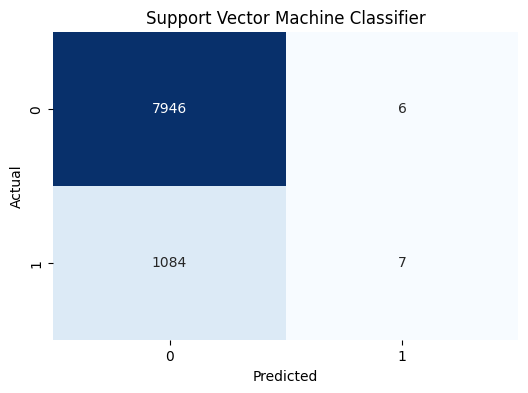

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para graficar la matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Graficar las matrices de confusión para cada modelo
plot_confusion_matrix(rf_conf_matrix, 'Random Forest Classifier')
plot_confusion_matrix(gb_conf_matrix, 'Gradient Boosting Classifier')
plot_confusion_matrix(svm_conf_matrix, 'Support Vector Machine Classifier')


# **CONCLUSIONES**


Basándonos en los resultados proporcionados y en la interpretación de los valores de precisión, recuperación y la matriz de confusión de cada modelo, podemos sacar las siguientes conclusiones:

Random Forest Classifier:
Tiene la precisión más alta entre los tres modelos (67.4%), lo que significa que de todas las instancias que clasifica como positivas, la mayoría son realmente positivas.
Sin embargo, su tasa de recuperación es la más baja (38.2%), lo que indica que no identifica correctamente una proporción significativa de las instancias positivas en el conjunto de datos.
La matriz de confusión muestra que hay una cantidad considerable de falsos negativos (674), lo que sugiere que el modelo está perdiendo algunas instancias positivas.

Gradient Boosting Classifier:
Tiene una precisión ligeramente más baja que Random Forest (64.8%), pero una tasa de recuperación ligeramente mejor (42.0%).
La matriz de confusión muestra un menor número de falsos negativos en comparación con Random Forest, lo que indica que este modelo es mejor para identificar las instancias positivas.

Support Vector Machine Classifier:
Aunque tiene una precisión moderada (53.8%), su tasa de recuperación es muy baja (0.6%).
La matriz de confusión muestra un alto número de falsos negativos (1084), lo que indica que el modelo no está identificando correctamente las instancias positivas.

Dado que el objetivo principal en la mayoría de los problemas de clasificación es maximizar tanto la precisión como la recuperación, el Gradient Boosting Classifier parece ser la mejor opción en este caso. Aunque tiene una precisión ligeramente menor que Random Forest, tiene una mejor tasa de recuperación y menos falsos negativos, lo que sugiere que es más efectivo para identificar las instancias positivas en el conjunto de datos.